In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
img = mpimg.imread("RGB.png")

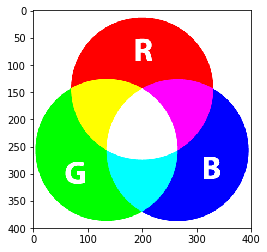

In [24]:
plt.imshow(img)

In [25]:
img.shape

(400L, 400L, 4L)

In [26]:
print img[300,250]

[ 0.  1.  1.  1.]


img is 400 x 400 pixels and has four channels: <br>
The first three are colors: red, green, and blue. <br>
The fourth is alpha, representing opacity. <br>
Let's look at the colors first. <br>

In [27]:
print img.min(), img.max()

0.0 1.0


In [28]:
# isolate the red channel
red = img[:,:,0]

In [29]:
print red[250, 250]

1.0


In [30]:
print red.shape
print [red.min(), red.max()]
print red.dtype

(400L, 400L)
[0.0, 1.0]
float32


It looks like color values are represented as a float from 0 to 1. <br>
This is not always the case.

In [31]:
mpimg.imsave("RGB.jpg",img)
img2 = mpimg.imread("RGB.jpg")
print img2[1,2]
print img2.shape
print [img2.min(), img2.max()]
print img2.dtype

[0 0 0 0]
(400L, 400L, 4L)
[0, 255]
uint8


The jpg image format, for example, doesn't even support an alpha layer, just the colors. <br>
And when we load it, the values are <tt>uint8</tt> 0 - 255 rather than floats.

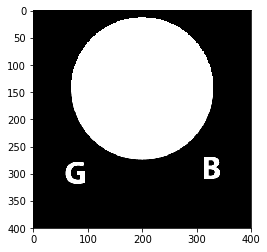

In [12]:
# Since red is now a just a 2D array, matplotlib doesn't know it represents RED any more
# We need to choose a colormap, just like when we generated 2D matrices and visualized them
# earlier in the preparation.
plt.imshow(red, cmap = "gray")

In [13]:
print red[0,0]
print red[red.shape[0]/2, red.shape[1]/2]

0.0
1.0


The top left corner has a value of 0 and shows up as black. <br>
The center has a value of 1 and shows up as white.

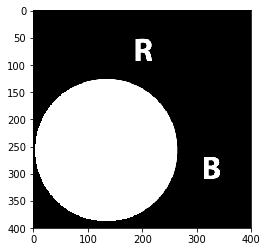

In [14]:
# Plot the green channel
green = img[:,:,1]
plt.imshow(green, cmap = "gray")

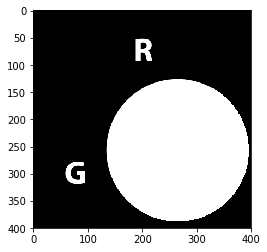

In [15]:
# Plot the blue channel
blue = img[:,:,2]
plt.imshow(blue, cmap = "gray")

(400L, 400L, 3L)


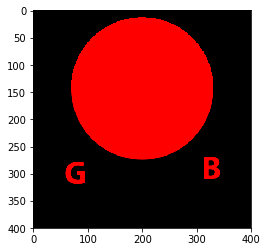

In [16]:
# If we really wanted to visualize the red channel as red, we could combine it with two other
# color channels that are all zero

# First we'd have to make it 400 x 400 x 1 (3D) instead of 400 x 400
red2 = red.reshape((400,400,1)) # my favorite way
# red2 = red[:,:,np.newaxis] # they way numpy suggested in the tutorial
zeros = np.zeros((400,400,1))

red_as_red = np.concatenate([red2, zeros, zeros],axis=2) # stack them along the third axis
print red_as_red.shape 
plt.imshow(red_as_red) # it's OK if the alpha channel is missing.

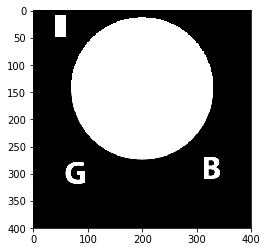

In [17]:
# Let's add something to the drawing
red2 = red.copy()
red2[10:50, 40:60] = 1
plt.imshow(red2, cmap = "gray")

We drew a rectangle at the top left. <br>
Note that the first axis is the ROW from the top left. <br>
The second axis is the column. 

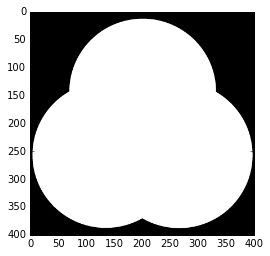

In [117]:
# Take a look at the alpha channel
alpha = img[:,:,-1]
plt.imshow(alpha, cmap = "gray")

The alpha channel represents opacity. <br>
The three circles have a value of 1 - they are completely opaque. <br>
Outside has a value of 0 - it is completely transparent.<br>
So if this image were to appear over another one, like in a web browser or PowerPoint,<br>
outside the circles would be transparent and you'd see the circles over the background image,<br>
not inside a white square.

[0.0, 2.0]


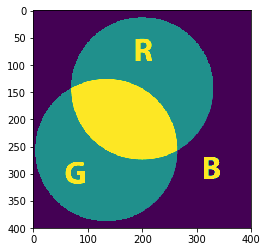

In [18]:
# What happens if we add add two color channels?
red2 = red + green
print [red2.min(), red2.max()]
plt.imshow(red2, cmap= "gray")

In this case, 2.0 shows as white, 0 is black, and 1.0 is gray. 

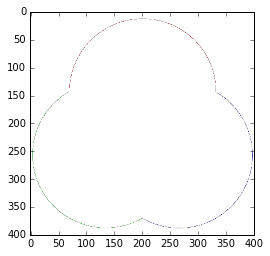

In [144]:
# You get some surprising behavior when you go outside the normal range of 0-1
plt.imshow(img*1.01)

Even though the values are out of the usual range, it normalizes everything. <br>
It will not be so forgiving in your assignment, <br>
when the color values are uint8 integers. 

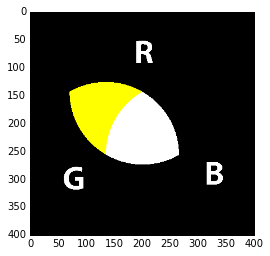

In [121]:
# Logical operations can be useful for selecting/changing parts of an image
# Let's only show where red and green intersect

# First let's get only the RGB chanels of the image. Drop the alpha layer.
img2 = img.copy()[:,:,:-1]

# Zero out everywhere that red and green are not both 1
img2[np.logical_not(np.logical_and(green == 1, red == 1))] = 0
plt.imshow(img2)

In [122]:
# We can convert from RGB to HSV color-space, but we need to get rid of the alpha layer
import matplotlib.colors as mpcol
img2 = mpcol.rgb_to_hsv(img[:,:,:-1])

# There is a magenta pixel at 200 down, 300 across. Let's find out its hue.
print img2[200,300,0]

0.833333


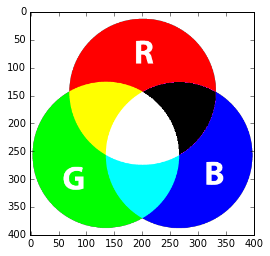

In [123]:
# Let's remove the magenta from the image
img3 = img.copy()

# Select the pixels where the hue is the same as at 200, 300 and 
# set all channels except for alpha to 0
img3[img2[:,:,0]==img2[200,300,0],:-1] = 0
plt.imshow(img3)

In [129]:
img2.shape

(400, 400, 3)